In [1]:
from sar.utils.factory import sarimage
from sar.utils.gmf import cmod5
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
dpi = float(matplotlib.rcParams['savefig.dpi'])

# SAR Nice Display

## Image test

In [2]:
# Instantiate reader object
# From modes sm->iw->ew, nice display usefulness increases as incidence angles range increases.
mode = 'iw'
if mode == 'sm':
    path = '/home/cercache/project/mpc-sentinel1/data/esa/sentinel-1a/L1/SM/S1A_SM_GRDH_1S/2015/058/'\
        'S1A_S6_GRDH_1SDV_20150227T142322_20150227T142347_004810_005FAC_A68E.SAFE/measurement/s1a-s6-grd-vv-20150227t142322-20150227t142347-004810-005fac-001.tiff'
elif mode == 'iw':
    path = '/home/cercache/project/mpc-sentinel1/data/esa/sentinel-1a/L1/IW/S1A_IW_GRDH_1S/2015/159/'\
        'S1A_IW_GRDH_1SDV_20150608T165957_20150608T170022_006284_0083D8_7091.SAFE/measurement/s1a-iw-grd-vv-20150608t165957-20150608t170022-006284-0083d8-001.tiff'
elif mode == 'ew':
    path = '/home/cercache/project/mpc-sentinel1/data/esa/sentinel-1a/L1/EW/S1A_EW_GRDH_1S/2015/010/'\
        'S1A_EW_GRDH_1SDV_20150110T165114_20150110T165219_004111_004FAD_E1B8.SAFE/measurement/s1a-ew-grd-vv-20150110t165114-20150110t165219-004111-004fad-001.tiff'
sarim = sarimage(path)
# Get sigma0, incidence angle and polarisation
spacing = 25 # in pixels
sigma0 = sarim.get_data('sigma0', spacing=spacing)
incidence = sarim.get_data('incidence', spacing=spacing)
polarisation = sarim.get_info('polarisation')
print 'Incidence angles range : [{:.2f}, {:.2f}]'.format(incidence.min(), incidence.max())

Incidence angles range : [29.49, 45.40]


## Nice display : step by step

In [3]:
# Compute a reference sigma0 given SAR incidence angles and a 10 m/s wind at 45 degrees
ref_sigma0 = cmod5(10, 45, incidence) # CMOD5 -> VV sigma0
if polarisation == 'HH': # Use Thompson polarisation ratio : VV -> HH
    alpha = 0.7
    polrat = (1 + 2*np.tan(incidence*np.pi/180)**2)**2 / \
            (1 + alpha*np.tan(incidence*np.pi/180)**2)**2
    ref_sigma0 /= polrat
# Normalise sigma0 by reference sigma0 in order to decrease the incidence angle dependancy
roughness = sigma0 / ref_sigma0

## Show results

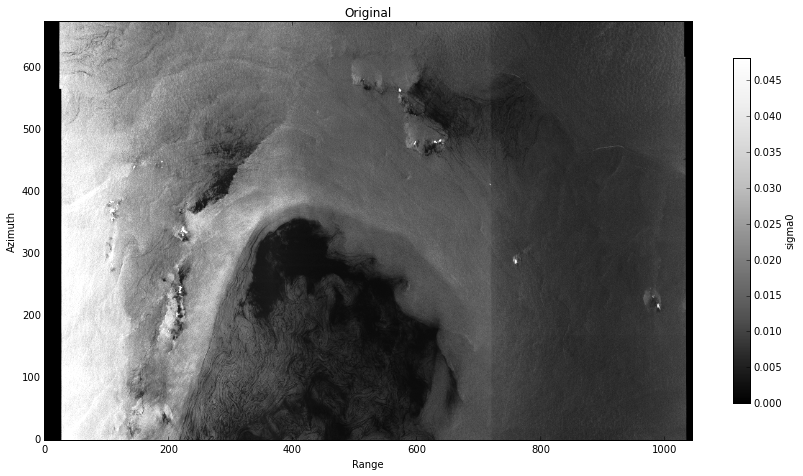

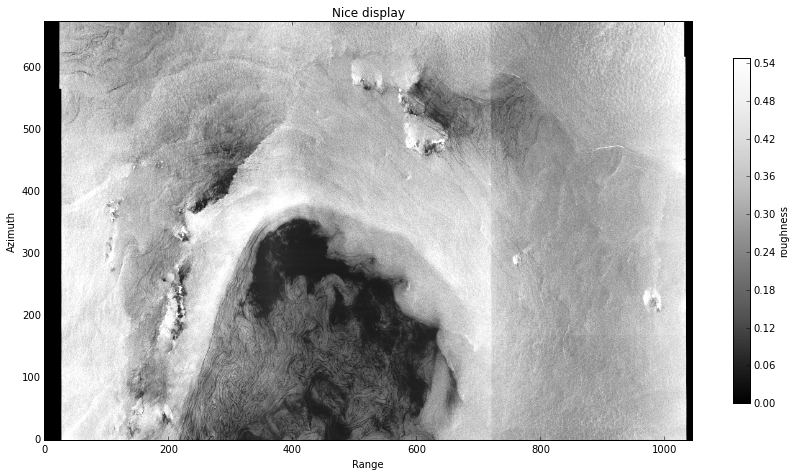

In [4]:
figsize = [d / dpi for d in sigma0.shape[::-1]]
# Show sigma0
plt.figure(figsize=figsize)
vmin, vmax = np.percentile(sigma0[np.where(sigma0 != 0)], [1, 99])
plt.imshow(sigma0, cmap=plt.cm.Greys_r, origin='lower', vmin=vmin, vmax=vmax)
plt.colorbar(label='sigma0', shrink=0.66)
plt.title('Original')
plt.xlabel('Range')
plt.ylabel('Azimuth')
# Show roughness
plt.figure(figsize=figsize)
vmin, vmax = np.percentile(roughness[np.where(roughness != 0)], [1, 99])
plt.imshow(roughness, cmap=plt.cm.Greys_r, origin='lower', vmin=vmin, vmax=vmax)
plt.colorbar(label='roughness', shrink=0.66)
plt.title('Nice display')
plt.xlabel('Range')
plt.ylabel('Azimuth')

## Compare profiles wrt incidence angle

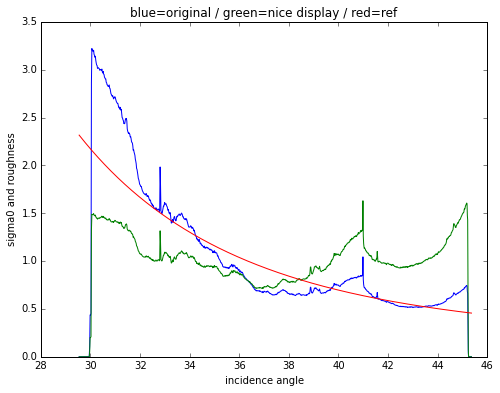

In [5]:
# Compute profiles, ie mean at each range
# (for inc and ref, we could also take the values at an arbitrary azimuth as it is almost constant for each range)
inc = incidence.mean(axis=0)
sigma0_profile = sigma0.mean(axis=0)
roughness_profile = roughness.mean(axis=0)
ref_profile = ref_sigma0.mean(axis=0)
# Normalise
sigma0_profile /= sigma0_profile.mean()
roughness_profile /= roughness_profile.mean()
ref_profile /= ref_profile.mean()
# And plot
plt.figure(figsize=(8, 6))
plt.plot(inc, sigma0_profile, 'b')
plt.plot(inc, roughness_profile, 'g')
plt.plot(inc, ref_profile, 'r')
plt.title('blue=original / green=nice display / red=ref')
plt.xlabel('incidence angle')
plt.ylabel('sigma0 and roughness')